In [114]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# import kagglehub
# clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

# print('Data source import complete.')


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [116]:
true_df = pd.read_csv('sampled_true.csv')
fake_df = pd.read_csv('sampled_fake.csv')

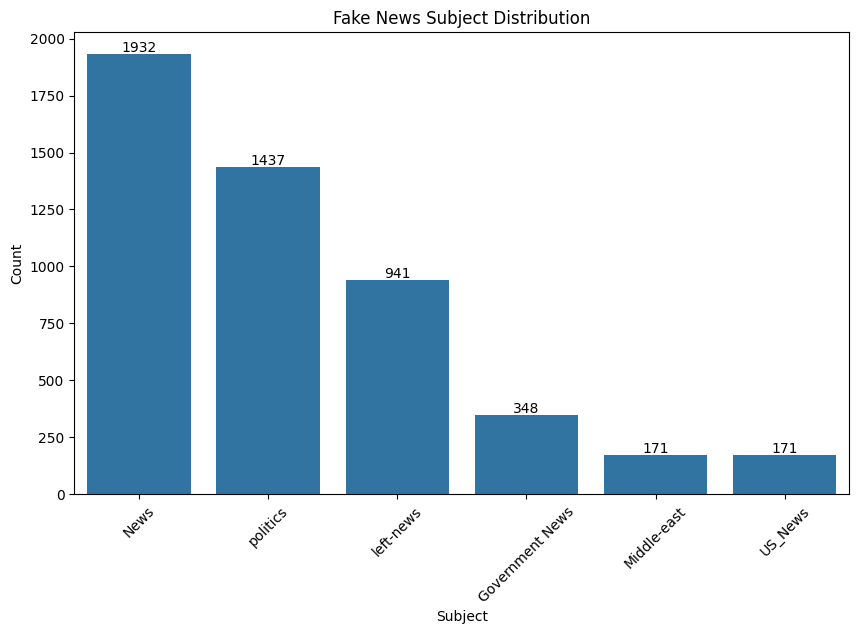

In [117]:
subject_counts = fake_df['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.show()

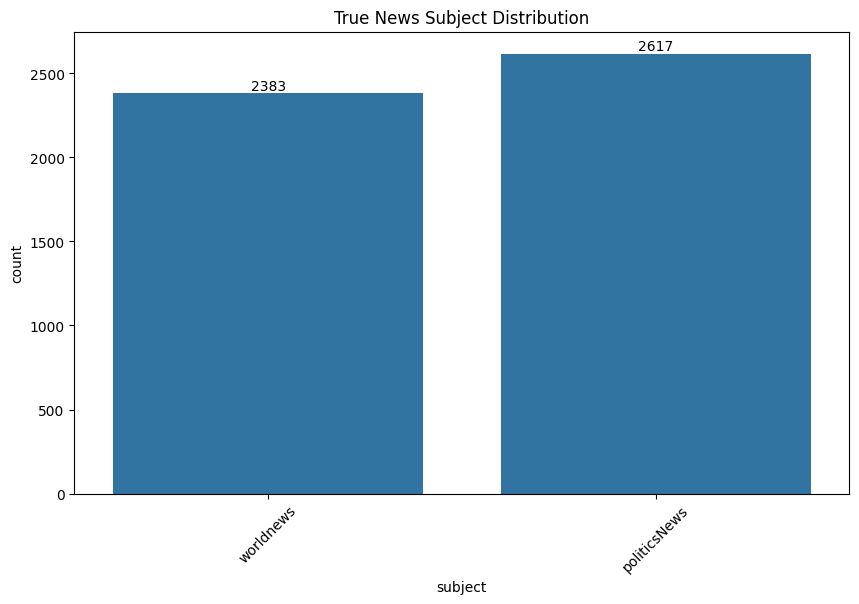

In [118]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true_df, x='subject')
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

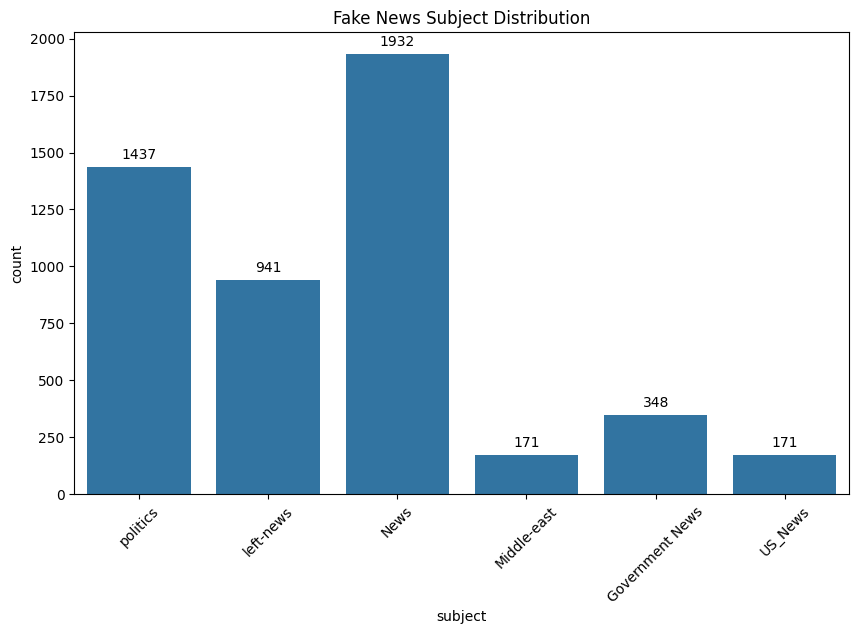

In [119]:
# Subject distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=fake_df, x='subject')
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

# Adding exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

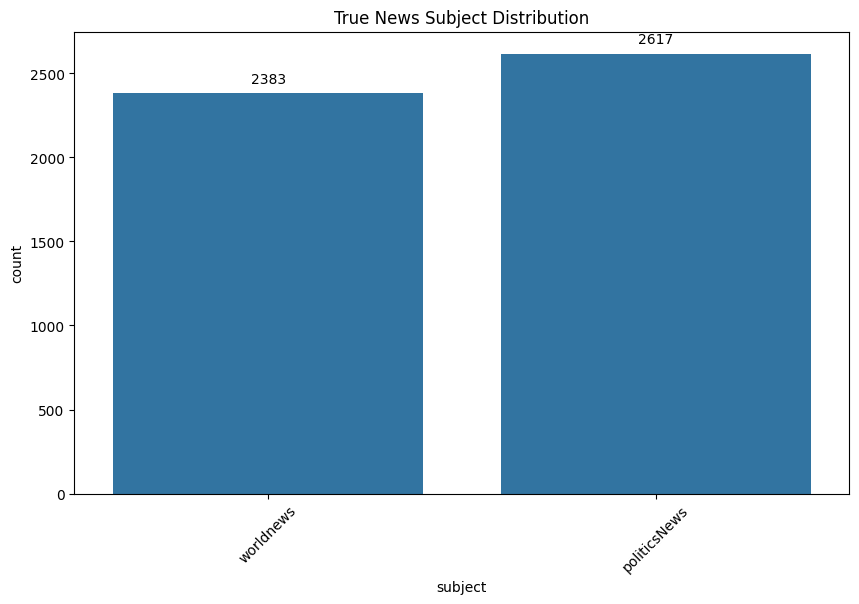

In [120]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true_df, x='subject')
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

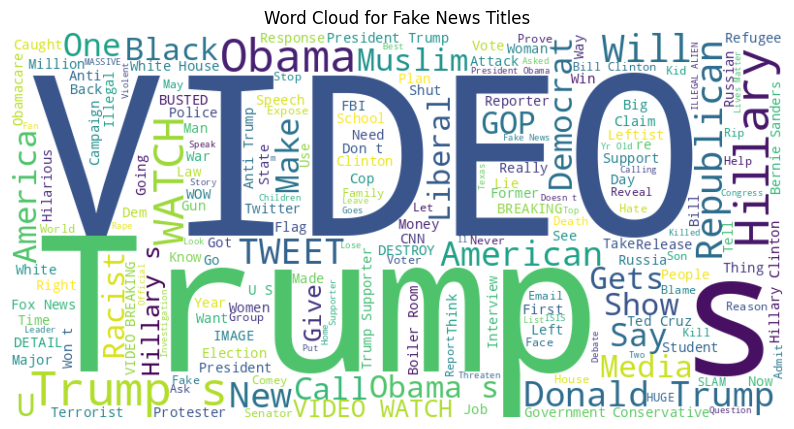

In [121]:
# Word cloud for fake news titles
fake_titles = ' '.join(fake_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

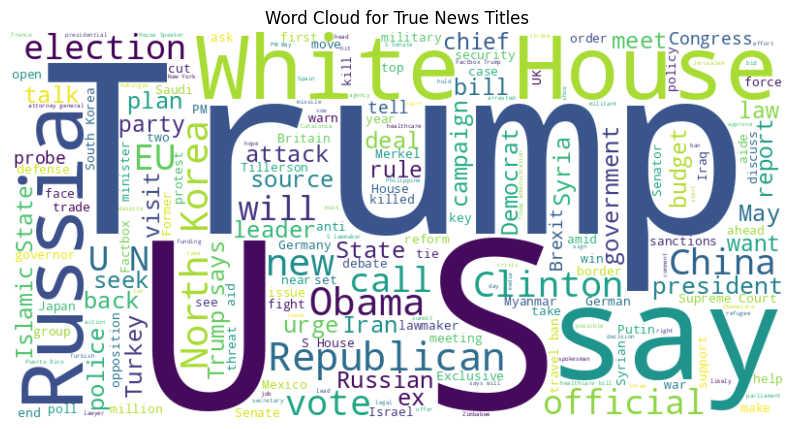

In [122]:
# Word cloud for true news titles
true_titles = ' '.join(true_df['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

=== Topic classification performance report ===
              precision    recall  f1-score   support

politicsNews       0.93      0.88      0.91       509
   worldnews       0.88      0.93      0.91       491

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



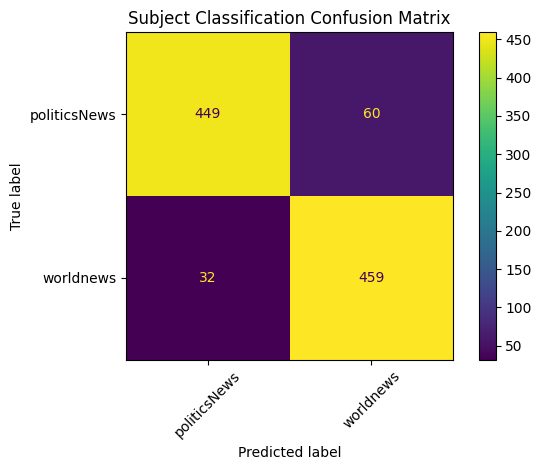

In [ ]:
df = true_df[['title', 'subject']].dropna()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['title'])
y = df['subject']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Train a topic classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting Topic categories
y_pred = model.predict(X_test)

# Output classification report
print("=== Topic classification performance report ===")
print(classification_report(y_test, y_pred))

# Visualizing the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title("Subject Classification Confusion Matrix")
plt.tight_layout()
plt.show()
